In [18]:
from plot_plus_new_parse_func import load_json_files
from plot_plus_new_parse_func import plot_data, parse_data
import re
import matplotlib.pyplot as plt

# Example usage


json_data = {}
directory_path = ['/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/1_jobs_4K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/5_jobs_4K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/10_jobs_4K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/15_jobs_4K',]

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    json_data[type_of_run] = load_json_files(item)

xmaster_list, ymaster_list, y2master_list, run_list, plot_title = parse_data(json_data, "Random Reads (5.15 kernel, 4K)", 'read')

json_data = {}
directory_path = ['/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/1_jobs_4K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/5_jobs_4K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/10_jobs_4K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/15_jobs_4K',]

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    json_data[type_of_run] = load_json_files(item)

x1master_list, y1master_list, y12master_list, run1_list, plot1_title = parse_data(json_data, "Random Reads (6.1 kernel, 4K)", 'read')

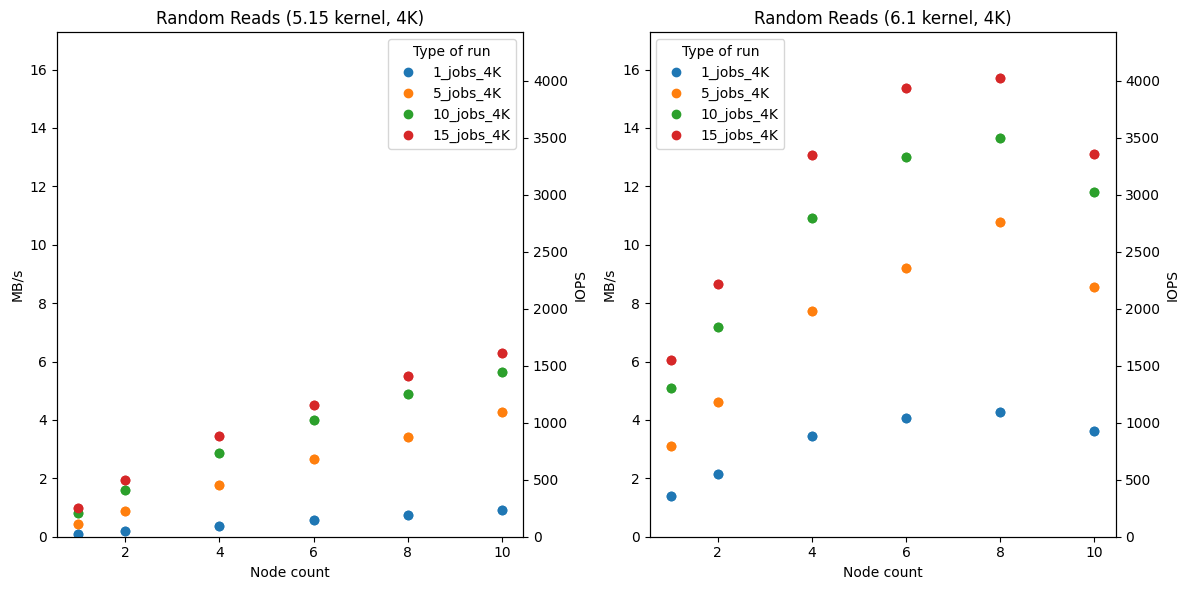

In [19]:
fig, (ax, ax3) = plt.subplots(1, 2, figsize=(12, 6))
ax2 = ax.twinx()

for i in range(len(xmaster_list)):
    ax.plot(xmaster_list[i], ymaster_list[i], 'o', label=run_list[i])
    ax2.plot(xmaster_list[i], y2master_list[i], 'o', label=run_list[i])
    
ax2.set_ylabel("IOPS")
ax.set_xlabel('Node count')
ax.set_ylabel('MB/s')
ax.set_title(plot_title)
ax.legend(title='Type of run')
plt.xticks(rotation=45)

ax22 = ax3.twinx()

for i in range(len(x1master_list)):
    ax3.plot(x1master_list[i], y1master_list[i], 'o', label=run1_list[i])
    ax22.plot(x1master_list[i], y12master_list[i], 'o', label=run1_list[i])
    
ax22.set_ylabel("IOPS")
ax3.set_xlabel('Node count')
ax3.set_ylabel('MB/s')
ax3.set_title(plot1_title)
ax3.legend(title='Type of run')
plt.xticks(rotation=45)

# Determine the maximum values for both sets of y-data
max_y1 = max(max(y) for y in ymaster_list)
max_y2 = max(max(y) for y in y2master_list)
max_y3 = max(max(y) for y in y1master_list)
max_y4 = max(max(y) for y in y12master_list)

# Determine the 10% margin
max_y = max(max_y1, max_y3) * 1.1
max_y_secondary = max(max_y2, max_y4) * 1.1

# Set the same y-limits for both plots
ax.set_ylim(0, max_y)
ax3.set_ylim(0, max_y)
ax2.set_ylim(0, max_y_secondary)
ax22.set_ylim(0, max_y_secondary)

plt.tight_layout()
plt.show()

Comparison Table between 5.15 kernel and 6.1 kernel:
+----+------------+--------------+----------------------+---------------------+--------------------+----------------------+---------------------+--------------------+
|    | Run Type   |   Node Count |   MB/s (5.15 kernel) |   MB/s (6.1 kernel) |   MB/s Speedup (%) |   IOPS (5.15 kernel) |   IOPS (6.1 kernel) |   IOPS Speedup (%) |
|----+------------+--------------+----------------------+---------------------+--------------------+----------------------+---------------------+--------------------|
|  0 | 1_jobs_4K  |            1 |            0.0947266 |             1.40234 |          1380.41   |              24.4565 |             359.174 |          1368.63   |
|  1 | 1_jobs_4K  |            2 |            0.18457   |             2.16309 |          1071.96   |              47.3519 |             553.931 |          1069.82   |
|  2 | 1_jobs_4K  |            4 |            0.369141  |             3.44434 |           833.069  |            

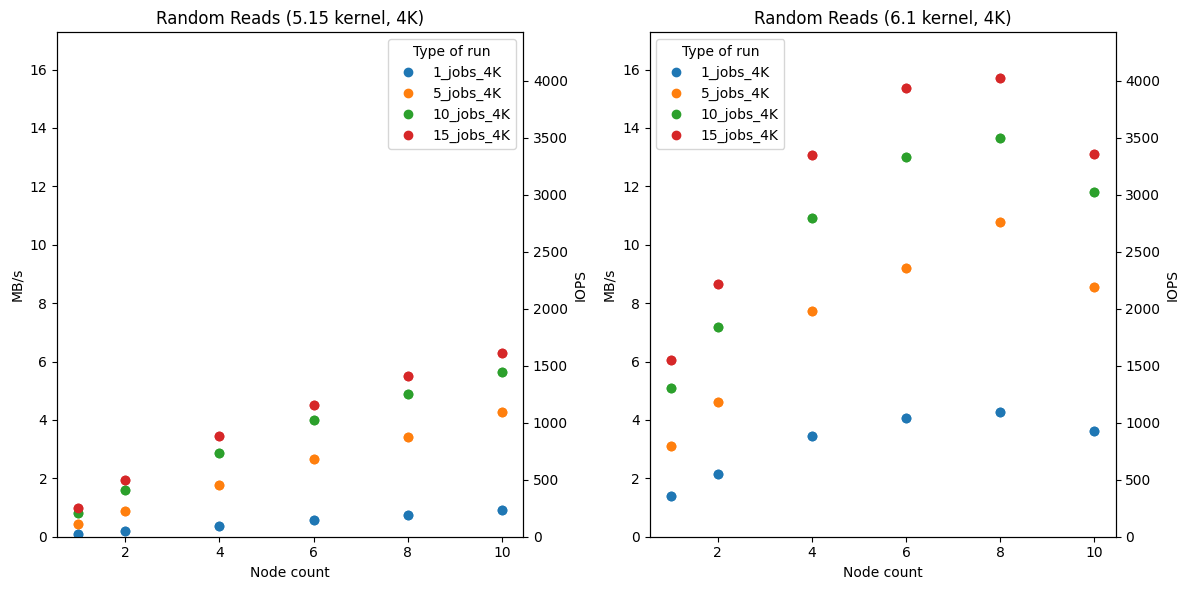

In [3]:
import pandas as pd
from plot_plus_new_parse_func import load_json_files, parse_data
import re
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load and parse data
def load_and_parse_data(directory_paths, plot_title, io_type):
    json_data = {}
    for item in directory_paths:
        type_of_run = re.split(r'[/]\s*', item)
        type_of_run = type_of_run[len(type_of_run)-1]
        json_data[type_of_run] = load_json_files(item)
    return parse_data(json_data, plot_title, io_type)

# Define the directories
dir_paths_515 = [
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/1_jobs_4K',
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/5_jobs_4K',
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/10_jobs_4K',
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/15_jobs_4K'
]

dir_paths_61 = [
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/1_jobs_4K',
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/5_jobs_4K',
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/10_jobs_4K',
    '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/15_jobs_4K'
]

# Parse the data
xmaster_list, ymaster_list, y2master_list, run_list, plot_title = load_and_parse_data(dir_paths_515, "Random Reads (5.15 kernel, 4K)", 'read')
x1master_list, y1master_list, y12master_list, run1_list, plot1_title = load_and_parse_data(dir_paths_61, "Random Reads (6.1 kernel, 4K)", 'read')

# Create a comparator engine
def compare_datasets(run_list1, x_list1, y_list1, y2_list1, run_list2, x_list2, y_list2, y2_list2):
    comparison_data = []
    for i in range(len(run_list1)):
        for j in range(len(x_list1[i])):
            run_type = run_list1[i]
            node_count = x_list1[i][j]
            y1 = y_list1[i][j]
            y2 = y2_list1[i][j]

            # Find the matching data point in the second dataset
            for k in range(len(run_list2)):
                if run_list2[k] == run_type:
                    for l in range(len(x_list2[k])):
                        if x_list2[k][l] == node_count:
                            y1_comp = y_list2[k][l]
                            y2_comp = y2_list2[k][l]
                            mb_speedup = (y1_comp - y1) / y1 * 100 if y1 != 0 else float('inf')
                            iops_speedup = (y2_comp - y2) / y2 * 100 if y2 != 0 else float('inf')
                            comparison_data.append({
                                'Run Type': run_type,
                                'Node Count': node_count,
                                'MB/s (5.15 kernel)': y1,
                                'MB/s (6.1 kernel)': y1_comp,
                                'MB/s Speedup (%)': mb_speedup,
                                'IOPS (5.15 kernel)': y2,
                                'IOPS (6.1 kernel)': y2_comp,
                                'IOPS Speedup (%)': iops_speedup
                            })
    return pd.DataFrame(comparison_data)

# Create comparison table
df_comparison = compare_datasets(run_list, xmaster_list, ymaster_list, y2master_list, run1_list, x1master_list, y1master_list, y12master_list)

# Print comparison table
print("Comparison Table between 5.15 kernel and 6.1 kernel:")
print(tabulate(df_comparison, headers='keys', tablefmt='psql'))

# Plotting the data
fig, (ax, ax3) = plt.subplots(1, 2, figsize=(12, 6))
ax2 = ax.twinx()

for i in range(len(xmaster_list)):
    ax.plot(xmaster_list[i], ymaster_list[i], 'o', label=run_list[i])
    ax2.plot(xmaster_list[i], y2master_list[i], 'o', label=run_list[i])
    
ax2.set_ylabel("IOPS")
ax.set_xlabel('Node count')
ax.set_ylabel('MB/s')
ax.set_title(plot_title)
ax.legend(title='Type of run')
plt.xticks(rotation=45)

ax22 = ax3.twinx()

for i in range(len(x1master_list)):
    ax3.plot(x1master_list[i], y1master_list[i], 'o', label=run1_list[i])
    ax22.plot(x1master_list[i], y12master_list[i], 'o', label=run1_list[i])
    
ax22.set_ylabel("IOPS")
ax3.set_xlabel('Node count')
ax3.set_ylabel('MB/s')
ax3.set_title(plot1_title)
ax3.legend(title='Type of run')
plt.xticks(rotation=45)

# Determine the maximum values for both sets of y-data
max_y1 = max(max(y) for y in ymaster_list)
max_y2 = max(max(y) for y in y2master_list)
max_y3 = max(max(y) for y in y1master_list)
max_y4 = max(max(y) for y in y12master_list)

# Determine the 10% margin
max_y = max(max_y1, max_y3) * 1.1
max_y_secondary = max(max_y2, max_y4) * 1.1

# Set the same y-limits for both plots
ax.set_ylim(0, max_y)
ax3.set_ylim(0, max_y)
ax2.set_ylim(0, max_y_secondary)
ax22.set_ylim(0, max_y_secondary)

plt.tight_layout()
plt.show()


In [20]:
from plot_plus_new_parse_func import load_json_files
from plot_plus_new_parse_func import plot_data, parse_data
import re
import matplotlib.pyplot as plt

# Example usage


json_data = {}
directory_path = ['/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/1_jobs_64K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/5_jobs_64K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/10_jobs_64K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/15_jobs_64K',]

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    json_data[type_of_run] = load_json_files(item)

xmaster_list, ymaster_list, y2master_list, run_list, plot_title = parse_data(json_data, "Random Reads (5.15 kernel, 64K)", 'read')

json_data = {}
directory_path = ['/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/1_jobs_64K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/5_jobs_64K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/10_jobs_64K',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/15_jobs_64K',]

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    json_data[type_of_run] = load_json_files(item)

x1master_list, y1master_list, y12master_list, run1_list, plot1_title = parse_data(json_data, "Random Reads (6.1 kernel, 64K)", 'read')

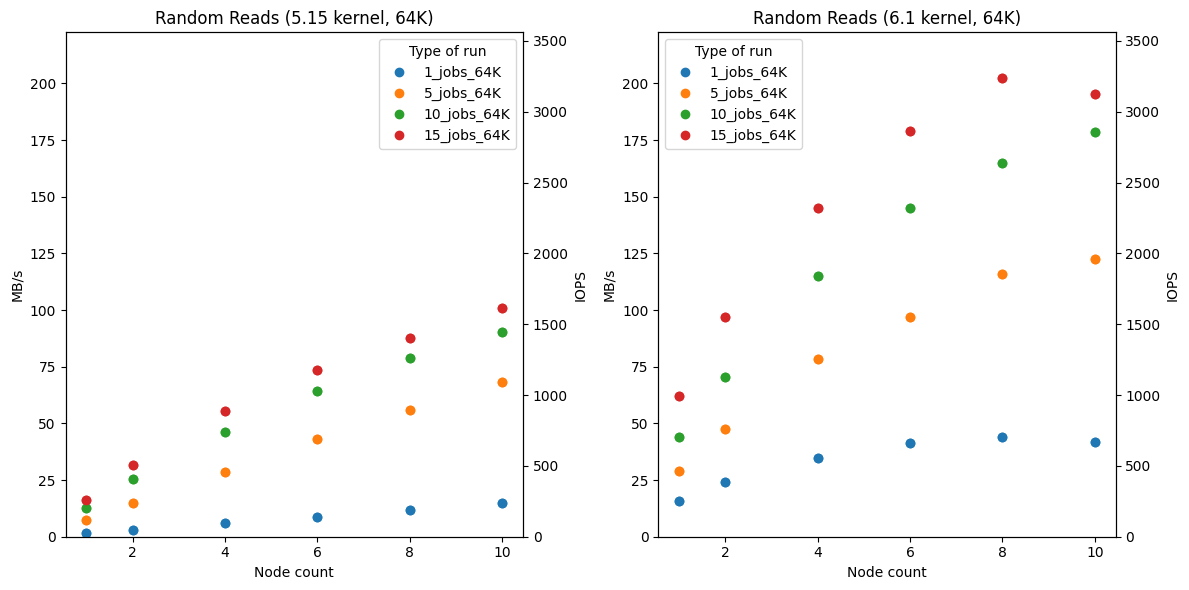

In [21]:
fig, (ax, ax3) = plt.subplots(1, 2, figsize=(12, 6))
ax2 = ax.twinx()

for i in range(len(xmaster_list)):
    ax.plot(xmaster_list[i], ymaster_list[i], 'o', label=run_list[i])
    ax2.plot(xmaster_list[i], y2master_list[i], 'o', label=run_list[i])
    
ax2.set_ylabel("IOPS")
ax.set_xlabel('Node count')
ax.set_ylabel('MB/s')
ax.set_title(plot_title)
ax.legend(title='Type of run')
plt.xticks(rotation=45)

ax22 = ax3.twinx()

for i in range(len(x1master_list)):
    ax3.plot(x1master_list[i], y1master_list[i], 'o', label=run1_list[i])
    ax22.plot(x1master_list[i], y12master_list[i], 'o', label=run1_list[i])
    
ax22.set_ylabel("IOPS")
ax3.set_xlabel('Node count')
ax3.set_ylabel('MB/s')
ax3.set_title(plot1_title)
ax3.legend(title='Type of run')
plt.xticks(rotation=45)

# Determine the maximum values for both sets of y-data
max_y1 = max(max(y) for y in ymaster_list)
max_y2 = max(max(y) for y in y2master_list)
max_y3 = max(max(y) for y in y1master_list)
max_y4 = max(max(y) for y in y12master_list)

# Determine the 10% margin
max_y = max(max_y1, max_y3) * 1.1
max_y_secondary = max(max_y2, max_y4) * 1.1

# Set the same y-limits for both plots
ax.set_ylim(0, max_y)
ax3.set_ylim(0, max_y)
ax2.set_ylim(0, max_y_secondary)
ax22.set_ylim(0, max_y_secondary)

plt.tight_layout()
plt.show()

In [22]:
from plot_plus_new_parse_func import load_json_files
from plot_plus_new_parse_func import plot_data, parse_data
import re
import matplotlib.pyplot as plt

# Example usage


json_data = {}
directory_path = ['/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/1_jobs_4M',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/5_jobs_4M',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/10_jobs_4M',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3538242/15_jobs_4M',]

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    json_data[type_of_run] = load_json_files(item)

xmaster_list, ymaster_list, y2master_list, run_list, plot_title = parse_data(json_data, "Random Reads (5.15 kernel, 4M)", 'read')

json_data = {}
directory_path = ['/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/1_jobs_4M',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/5_jobs_4M',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/10_jobs_4M',
                  '/mnt/home/skrit/Documents/PyBenchFramework/results/randread/EC63/3550542/15_jobs_4M',]

for item in directory_path:
    type_of_run = re.split(r'[/]\s*', item)
    type_of_run = type_of_run[len(type_of_run)-1]
    json_data[type_of_run] = load_json_files(item)

x1master_list, y1master_list, y12master_list, run1_list, plot1_title = parse_data(json_data, "Random Reads (6.1 kernel, 4M)", 'read')

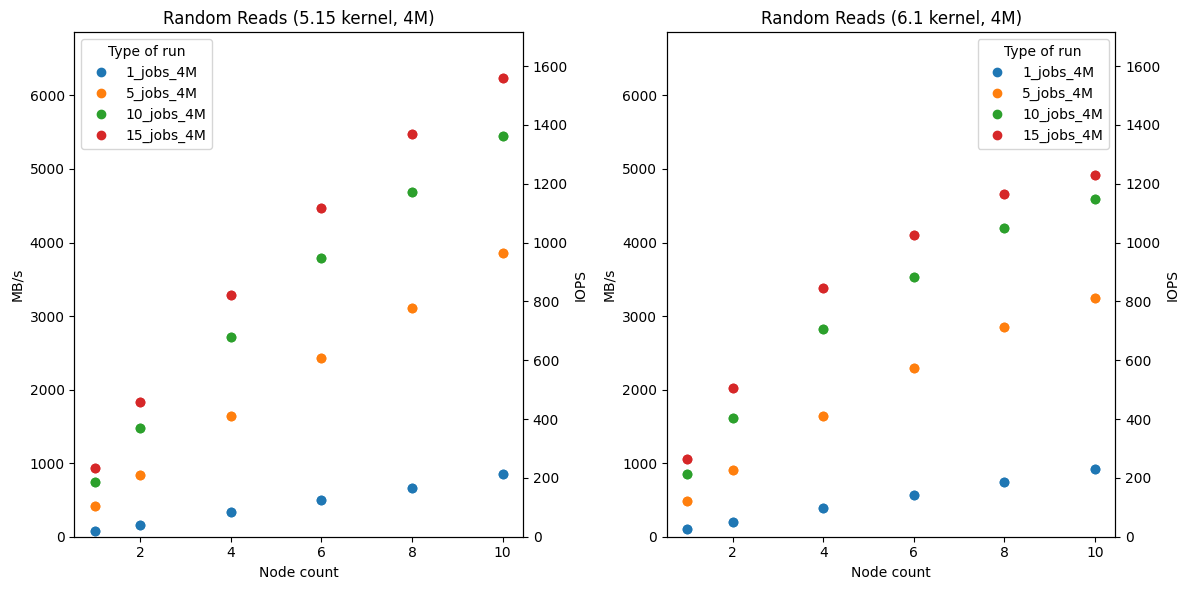

In [23]:
fig, (ax, ax3) = plt.subplots(1, 2, figsize=(12, 6))
ax2 = ax.twinx()

for i in range(len(xmaster_list)):
    ax.plot(xmaster_list[i], ymaster_list[i], 'o', label=run_list[i])
    ax2.plot(xmaster_list[i], y2master_list[i], 'o', label=run_list[i])
    
ax2.set_ylabel("IOPS")
ax.set_xlabel('Node count')
ax.set_ylabel('MB/s')
ax.set_title(plot_title)
ax.legend(title='Type of run')
plt.xticks(rotation=45)

ax22 = ax3.twinx()

for i in range(len(x1master_list)):
    ax3.plot(x1master_list[i], y1master_list[i], 'o', label=run1_list[i])
    ax22.plot(x1master_list[i], y12master_list[i], 'o', label=run1_list[i])
    
ax22.set_ylabel("IOPS")
ax3.set_xlabel('Node count')
ax3.set_ylabel('MB/s')
ax3.set_title(plot1_title)
ax3.legend(title='Type of run')
plt.xticks(rotation=45)

# Determine the maximum values for both sets of y-data
max_y1 = max(max(y) for y in ymaster_list)
max_y2 = max(max(y) for y in y2master_list)
max_y3 = max(max(y) for y in y1master_list)
max_y4 = max(max(y) for y in y12master_list)

# Determine the 10% margin
max_y = max(max_y1, max_y3) * 1.1
max_y_secondary = max(max_y2, max_y4) * 1.1

# Set the same y-limits for both plots
ax.set_ylim(0, max_y)
ax3.set_ylim(0, max_y)
ax2.set_ylim(0, max_y_secondary)
ax22.set_ylim(0, max_y_secondary)

plt.tight_layout()
plt.show()